## 시계열 자료(time series data)
- 연속적인 데이터, 이산적 시계열 데이터(이산적 시점에서 1시간,2시간...)
- 추세변동, 순환변동, 계절변동, 불규칙 변동
- time lag(시차)가 중요한 역활
- 과거의 시계열적인 패턴(데이터)에서 새로운 인사이트를 찾아내고자 함
- 평균,분산이 일정한 데이터가 시계열 분석에서 좋다  
- 추세,계절적 요인을 제거해줘야 할 필요가 있다 --> 일정한 평균과 분산을 얻기 위해서
- 순환적인 요인은 제거할 필요가 없다
- 불규칙 제거할 필요가 있다
    - 평활화 기법(smoothing)

* 가설
    - 귀무 가설(Null hypothesis) : 새로운게 없는 기존의 내용 
    - 대립 가설(Alternative hypothesis) : 대립가설을 부정하고, 연구자가 주장하고자 하는 내용
* p-value
    - 데이터가 포함될 확률
    - 귀무가설이 맞다고 가정할 때, 관찰된 결과가 이뤄질 확률
    - p-value값이 alpha보다 작으면 귀무가설을 기각하고, 대립가설을 채택한다
    - 가능성에 대해서만 말해야한다 --> 무조건 맞다라고 말할 순 없다 !
* 오류
    - 1종오류 : 귀무가설이 참인데, 귀무가설을 기각할 때(대립가설을 채택할 때)
    - 2종오류 : 귀무가설이 거짓일때, 귀무가설을 기각하지 않을 때(귀무가설을 채택할 때)

* 시계열 형태
    - 불규칙 변동 : irregular variation, 제거, 완화의 필요성이 있다 
    - 추세 변동 : trend variation, 추세를 없애주는 것이 좋다(평균,분산을 일정하게 한다)
    - 계절 변동 : seasonal variation, 계절적 요인을 없애주는 것이 좋다(평균, 분산을 일정하게 한다)
    - 순환 변동 : cyclical variation, 주기성있는 것은 제거할 필요가 없다 --> time lag가 일정하지 않는 것들(=주기성을 갖는 것), 계절성과 구분해야 됨 !!!

### 추세 변동(trend variation)

In [2]:
import pandas as pd
import numpy as np

# DatetiemIndex
dates= pd.date_range('2020-01-01',periods=48,freq='M')

# additive model: trend + cycle + seasonality + irregular factor
timestamp = np.arange(len(dates))
trend_factor = timestamp *1.1
cycle_factor = 10*np.sin(np.linspace(0,3.12*2,48))
seasonal_factor = 7*np.sin(np.linspace(0,3.12*8,48))
np.random.seed(2004)
irregular_factor = 2*np.random.randn(len(dates))

df=pd.DataFrame({'timeseries':trend_factor+cycle_factor+seasonal_factor+irregular_factor,
                 'trend': trend_factor,
                 'cycle': cycle_factor,
                 'seasonal':seasonal_factor,
                 'irregular':irregular_factor},
                 index=dates)
df.head()

,timeseries,trend,cycle,seasonal,irregular
2020-01-31,2.596119,0.0,0.000000,0.000000,2.596119
2020-02-29,6.717197,1.1,1.323763,3.545157,0.748278
2020-03-31,8.072610,2.2,2.624226,6.113756,-2.865371
2020-04-30,8.234387,3.3,3.878500,6.998245,-5.942358
2020-05-31,16.910984,4.4,5.064509,5.954980,1.491495


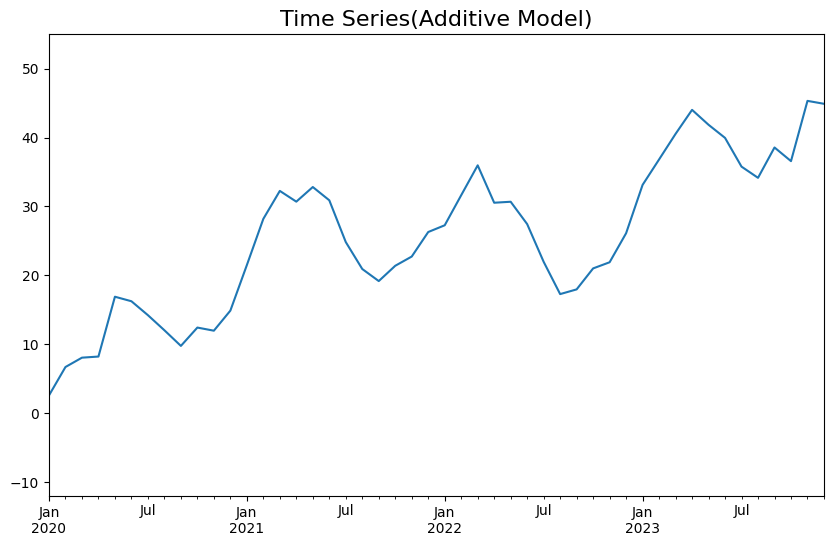

In [3]:
# Time series plot
import matplotlib.pyplot as plt

plt.figure(figsize=[10,6])
df.timeseries.plot()
plt.title('Time Series(Additive Model)',fontsize=16)
plt.ylim(-12,55)
plt.show()

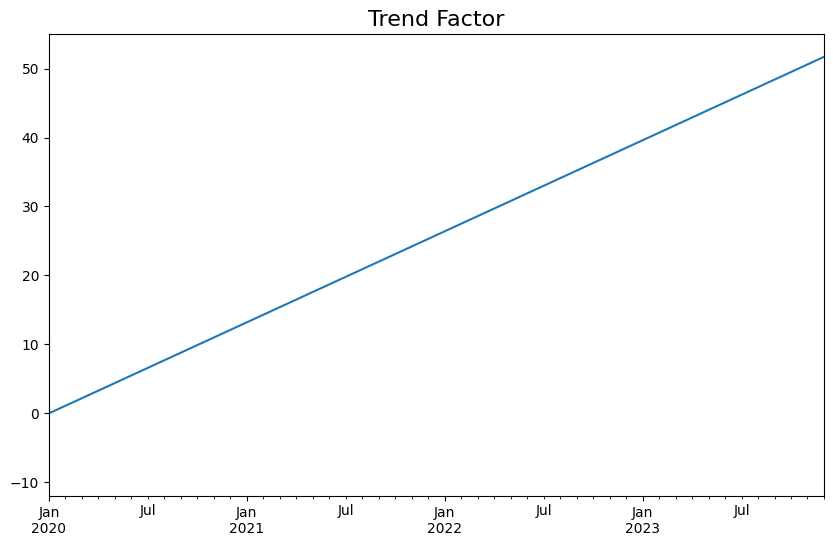

In [4]:
# Trend variation
# timestampt= np.arange(len(dates))
# trend_factor=timestamp*1.1

plt.figure(figsize=[10,6])
df.trend.plot()
plt.title('Trend Factor',fontsize=16)
plt.ylim(-12,55)
plt.show()

### 순환 분석(cyclical variation)
    - 주기가 있어도, time lag가 다르면 순환이 있더
    - 순환적 요인은 제거하지 않는다

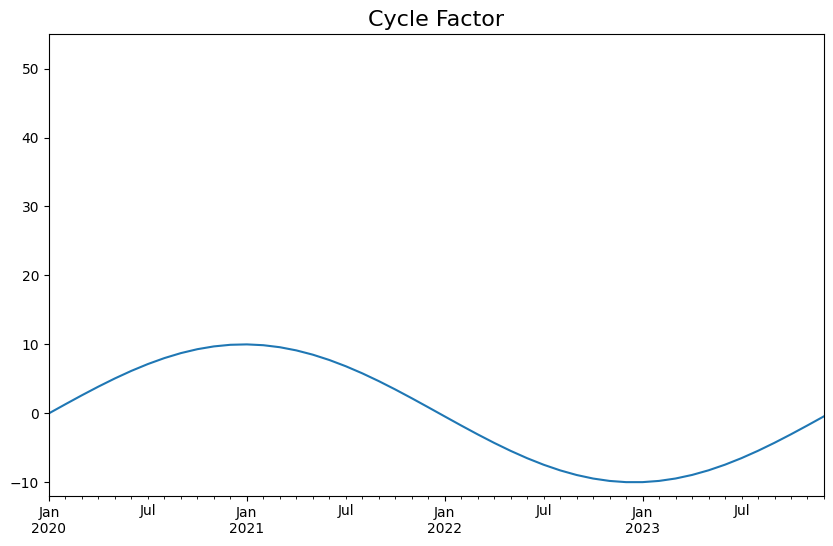

In [5]:
# 4년 주기
# cyclical variation

plt.figure(figsize=[10,6])
df.cycle.plot()
plt.title('Cycle Factor',fontsize=16)
plt.ylim(-12,55)
plt.show()

### 계절 변동(Seasonal variation)

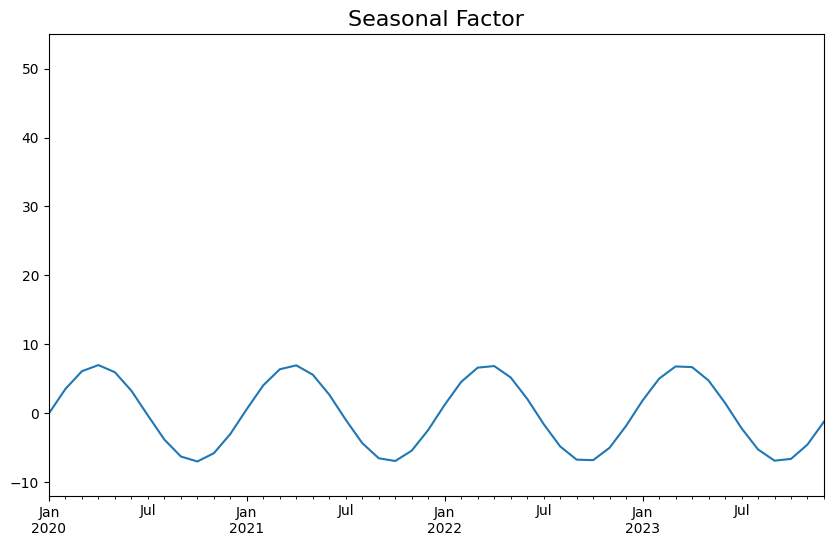

In [6]:
# seasonal factor

plt.figure(figsize=[10,6])
df.seasonal.plot()
plt.title('Seasonal Factor',fontsize=16)
plt.ylim(-12,55)
plt.show()

### 불규칙 변동(irregular variation)
    - 불규칙 변동 제거 필요 --> Smoothing Methods

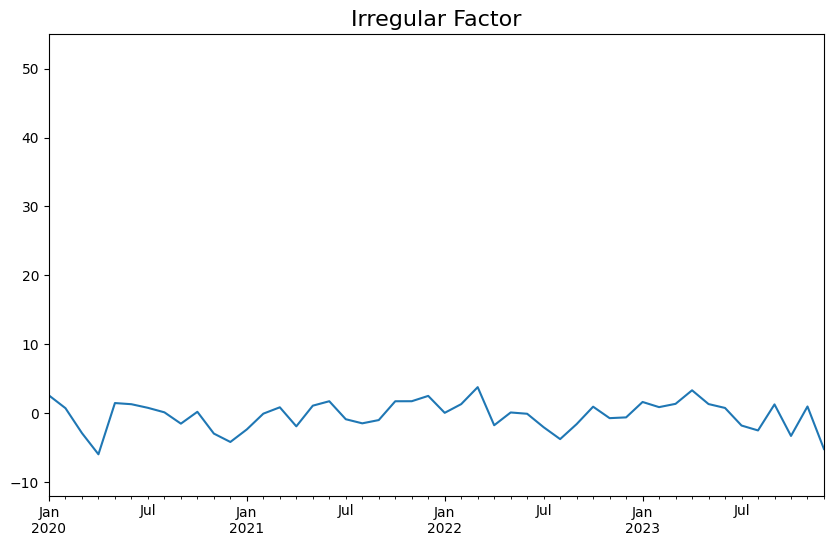

In [7]:
# 불규칙 변동 --> 제거해야함
# irregular variation

plt.figure(figsize=[10,6])
df.irregular.plot()
plt.title('Irregular Factor',fontsize=16)
plt.ylim(-12,55)
plt.show()

## 평활화 기법 (Smoothing Methods)
    - 불규칙성을 없애는 방법
    
    * 이동평균법
    * 지수평활법

## 이동평균법(moving average method)
    - n (n 기간 동안) 의 평균을 구해서 연결하는 방법
    - 전체 관측치의 개수가 줄어든다
    - 평균값으로 연결하므로, 데이터가 파악할 수 있을 정도로 나타날것이라고 생각한다
    
    * SMA(simple moving average)
        - 단순 이동 평균은 가장 일반적인 평균 유형
        - pandas의 Series.rolling(window=20) 메서드 이용
        - window = 구간 개수
        - 슬라이딩 넓이의 값이 클수록 데이터가 평활해지만, 값이 크면 정확도가 떨어질 수 있다

    * EMA(Exponential Moving Average)
        - 가까운 데이터에 가중치를 더 많이 준다
        - 멀어진 데이터에 가중치를 덜 준다
        - pandas의 Series.ewn() 메서드를 이용
    

In [13]:
# pip install -U finance-datareader

### SMA(simple moning aveage)

Text(0.5, 1.0, 'Close Price for Apple')

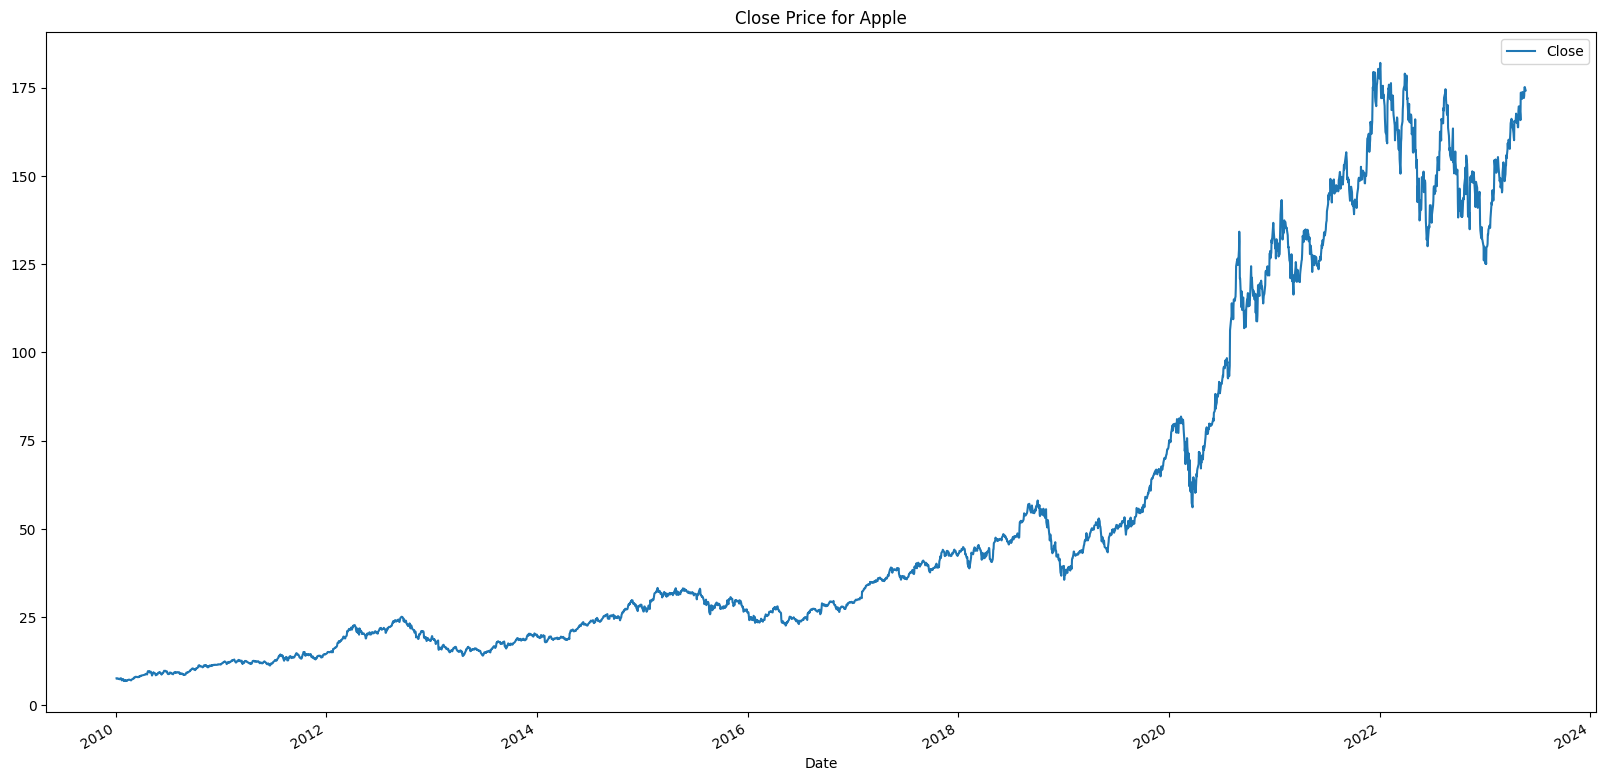

In [33]:
import FinanceDataReader as fdr

# 2010년 ~ 현재까지의 애플 주가를 데이터 프레임으로 불러오기
df_apple = fdr.DataReader("AAPL", start = "2010")

# 가장 마지막(최신)의 10일치 주가 출력
df_apple.tail(10)

df_apple[["Close"]].plot(figsize=(20, 10))
df_apple["Close_7Days_Mean"] = df_apple["Close"].rolling(7).mean()
plt.title("Close Price for Apple")

<Axes: xlabel='Date'>

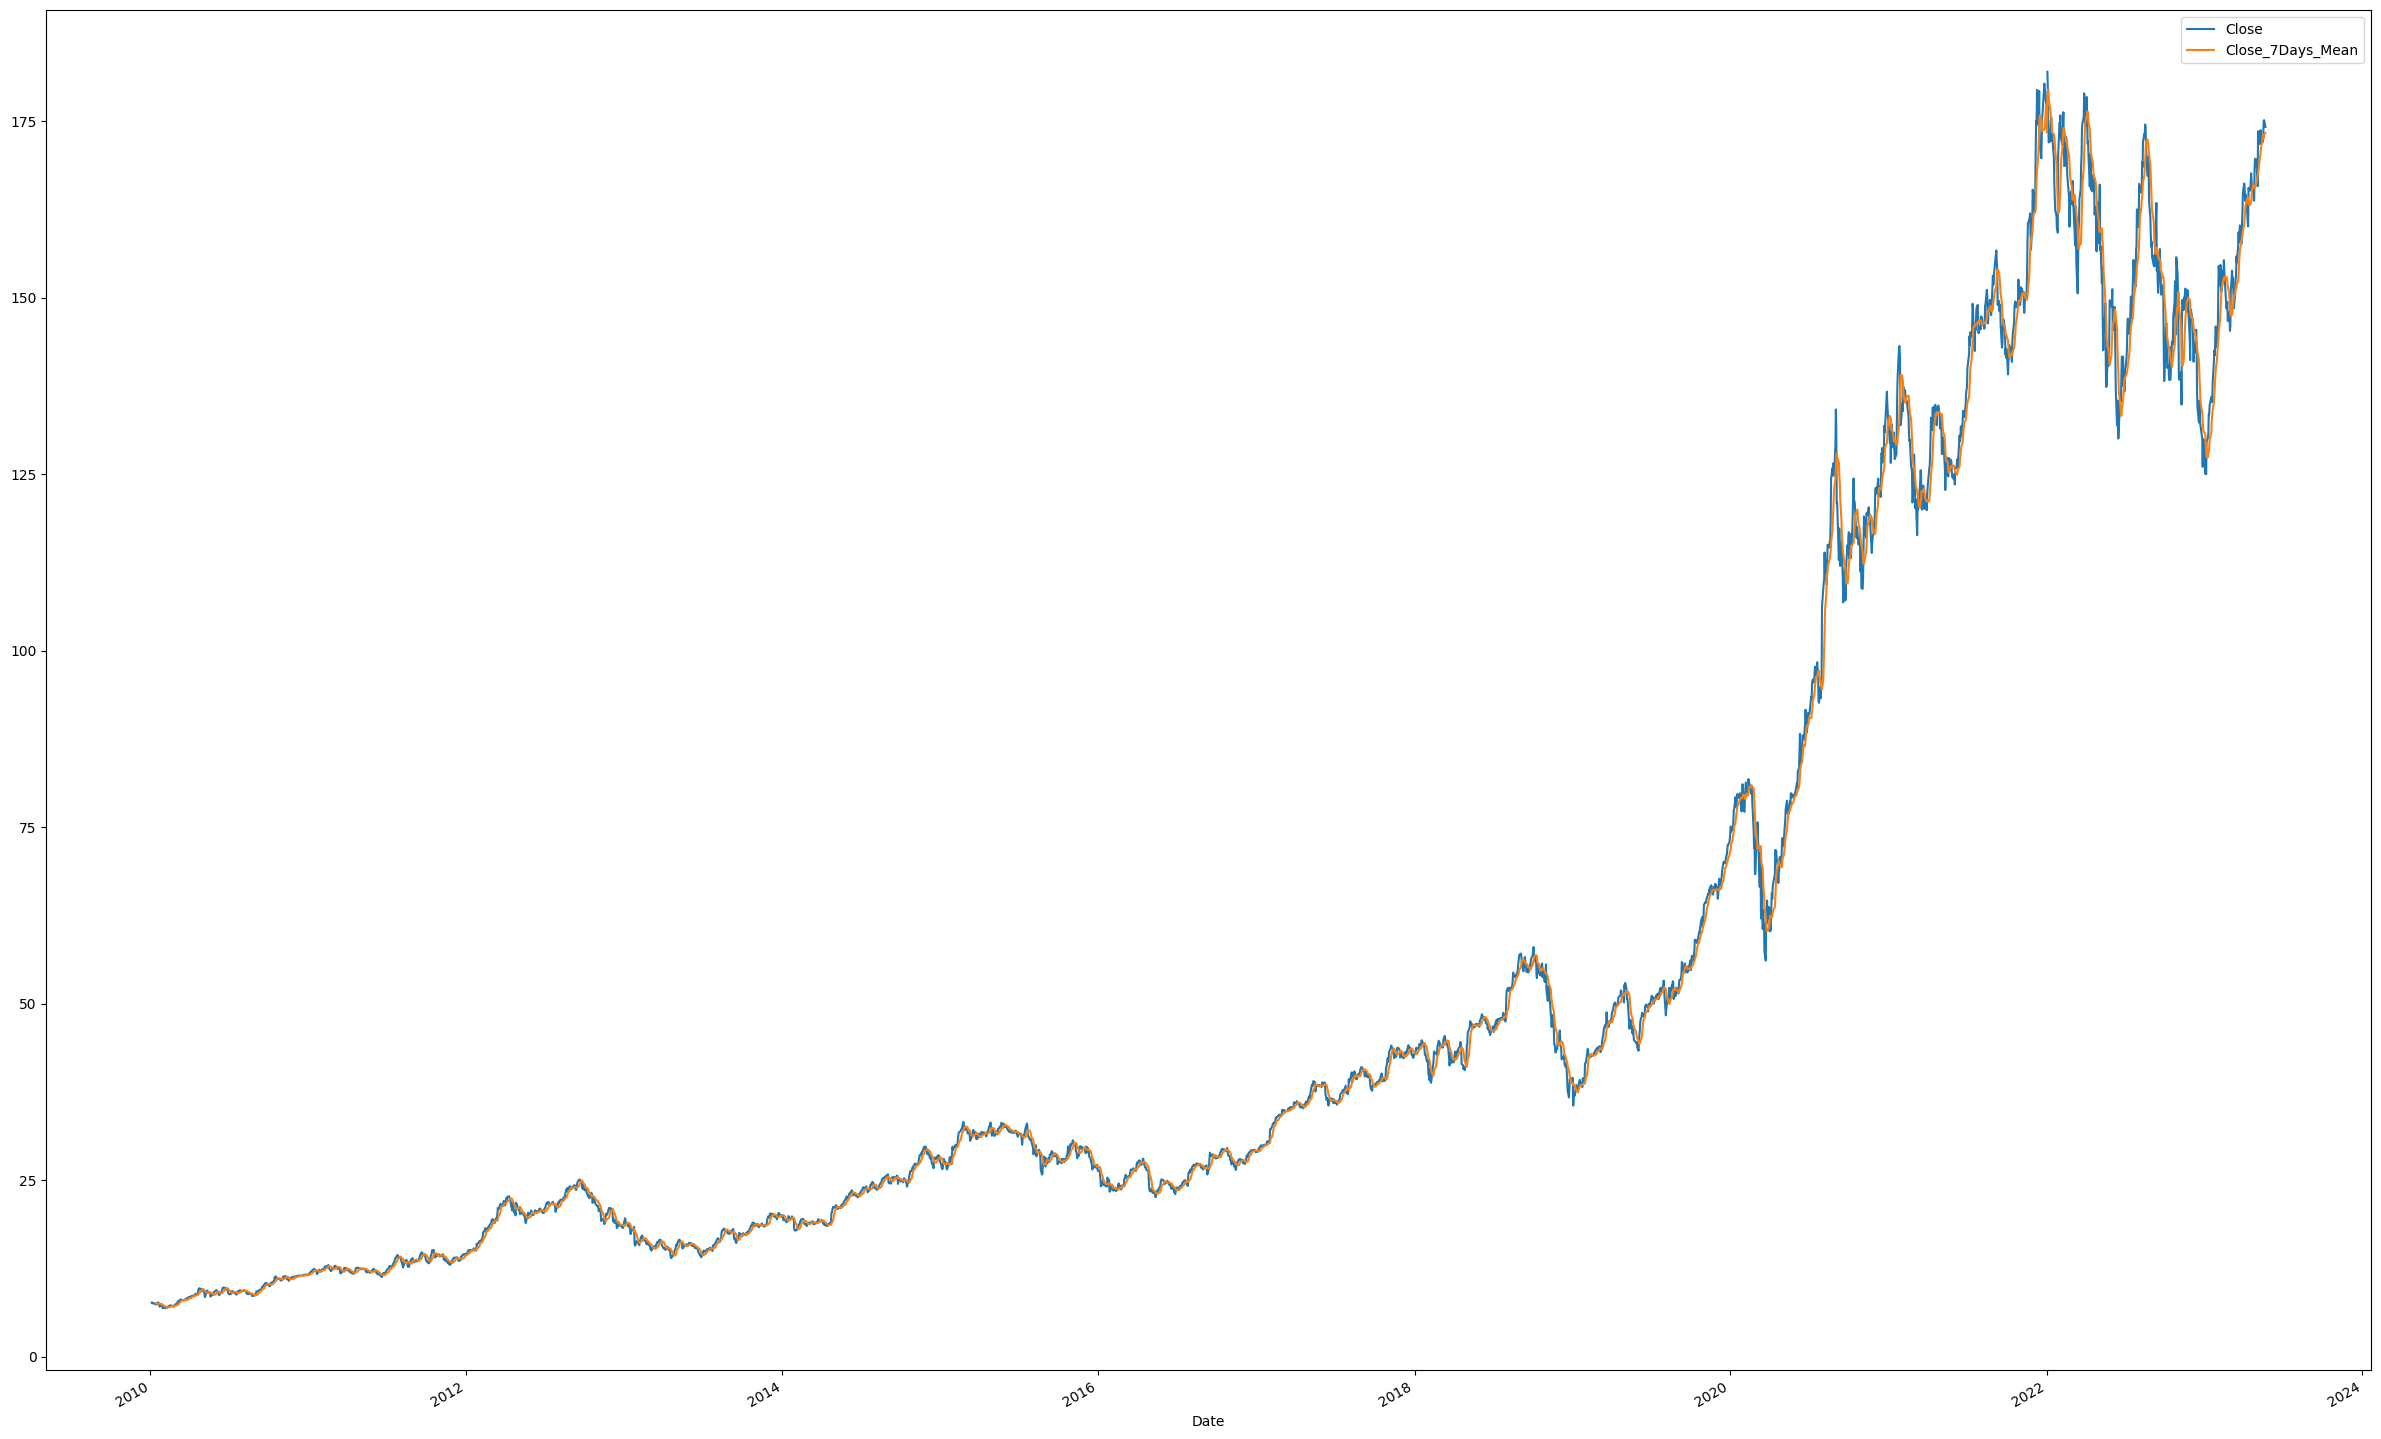

In [34]:
from datetime import datetime
last_day = datetime(2022, 1, 2)
df_apple.loc[last_day, "Close"] = np.nan
df_apple["Close_7Days_Mean"] = df_apple["Close"].rolling(7).mean().shift(1)
df_apple[["Close", "Close_7Days_Mean"]].plot(figsize=(30, 20))
# 7일전 평균값 그래프 + 종가 그래프

Text(0.5, 1.0, 'Monthly Mean Close Price for Apple')

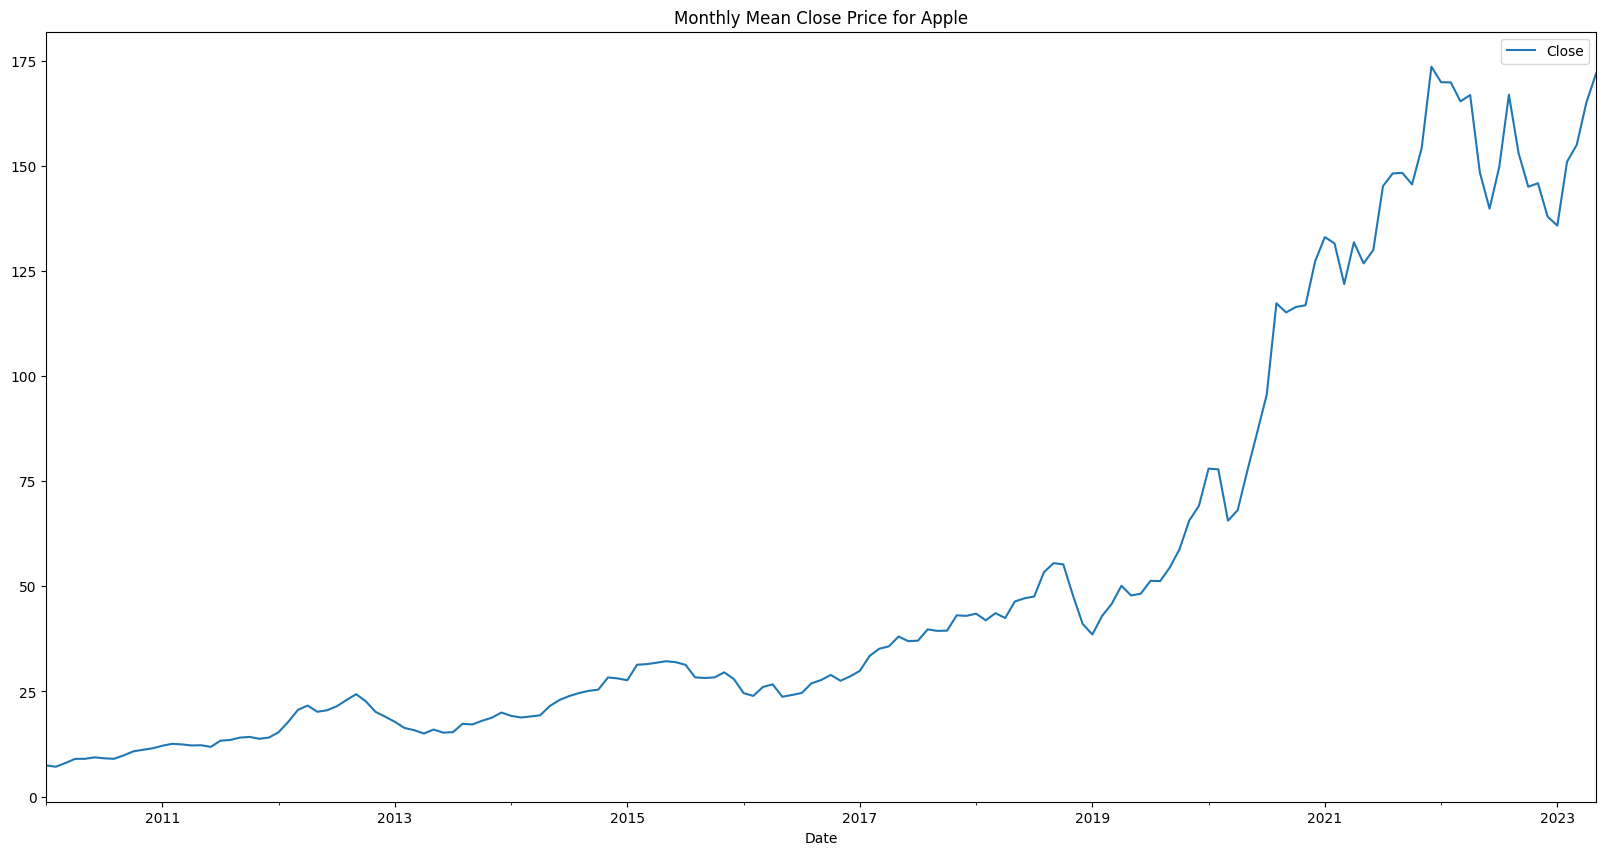

In [35]:
# 월단위로 주식 가격의 평균을 샘플링
df_apple_monthly = df_apple.resample(rule="M").mean()
# 마지막 컬럼 (Close_7Days_Mean) 제외
df_apple_monthly = df_apple_monthly.iloc[:, :-1]
# 월별 주가(종가)를 시각화
df_apple_monthly[["Close"]].plot(figsize = (20, 10))
plt.title("Monthly Mean Close Price for Apple")

<Axes: xlabel='Date'>

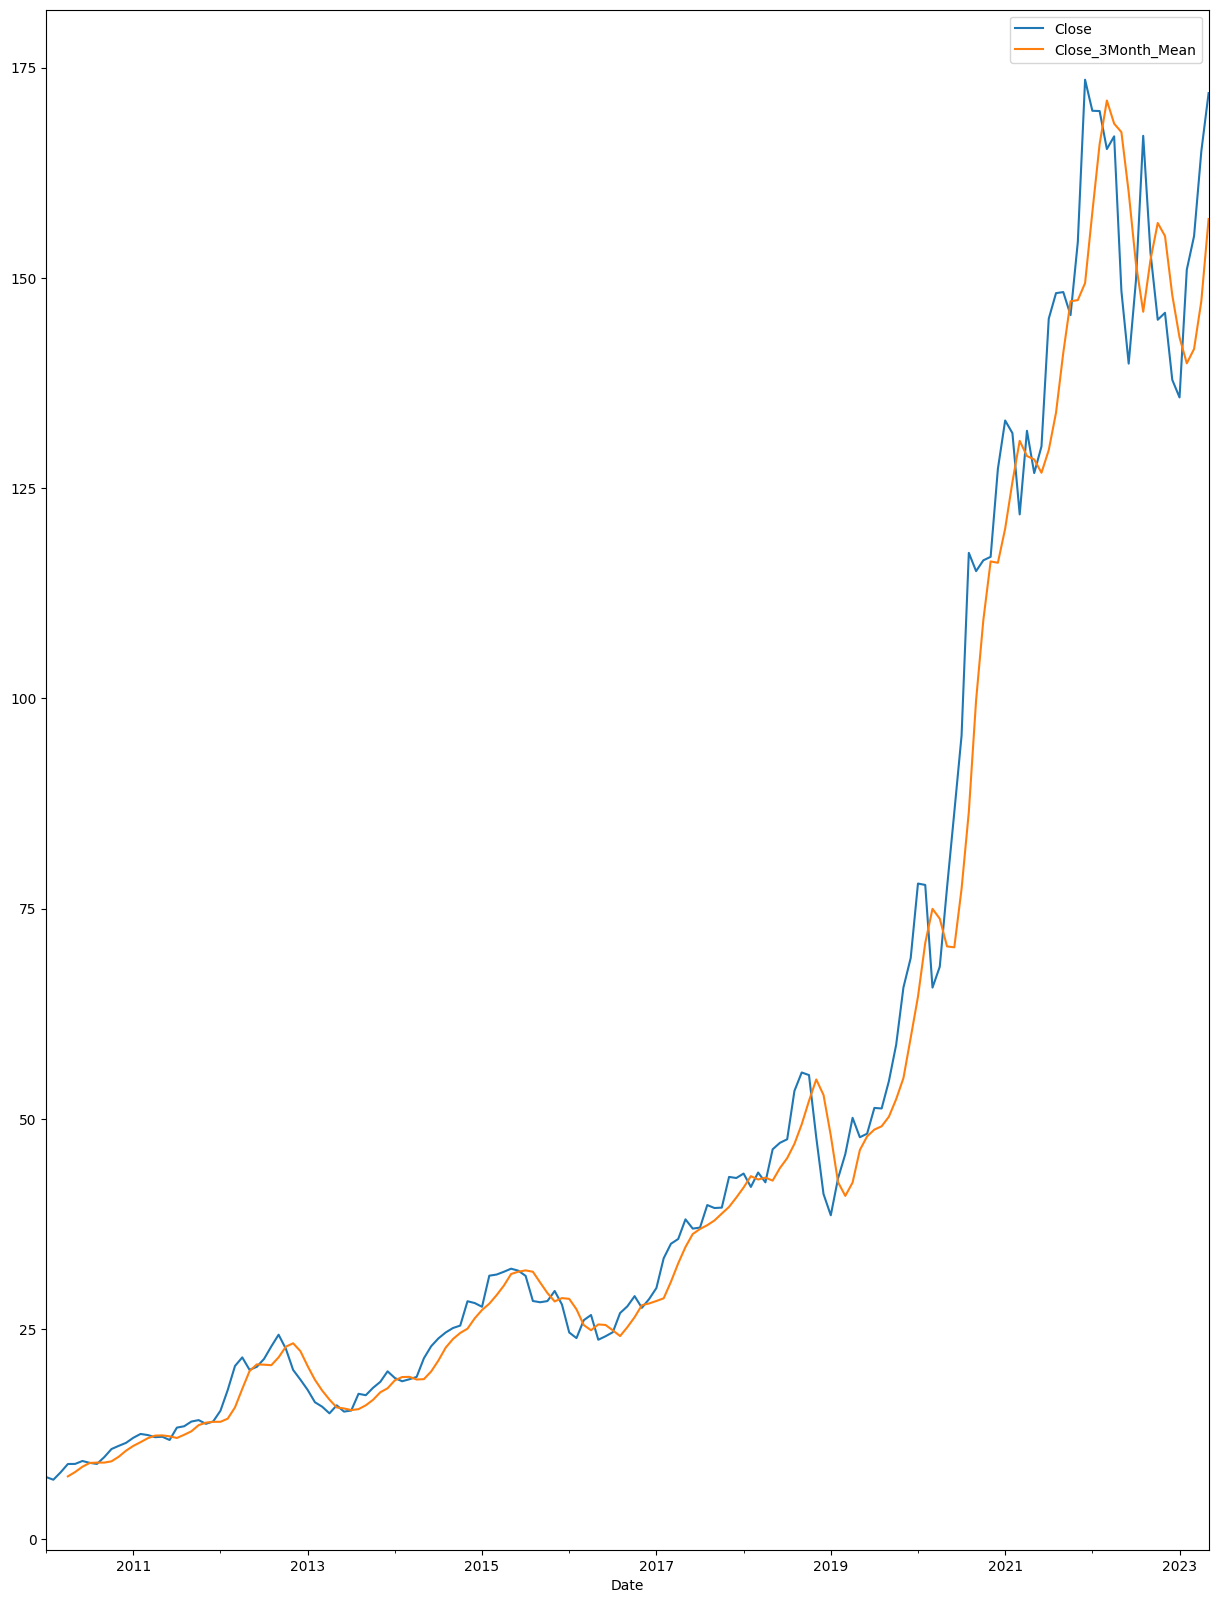

In [36]:
df_apple_monthly[["Close_3Month_Mean"]] = df_apple_monthly[["Close"]].rolling(3).mean().shift(1)
df_apple_monthly[["Close", "Close_3Month_Mean"]].plot(figsize=(15, 20))

### EMA(Exponential Moving Average)

## 정상성(Stationarity)
    - 정태성(일정하여 늘 한결같은 성질)이라고 함
    - 평균과, 분산이 일정하다
    - 시계열에서 정상성이 있다는 것은 추세나 동향이 없는 상태
    - stationarity가 있는 데이터를 가지고 시계열 분석을 해야 한다.
    - 시계열 모형으로 적합시키기 위한 전제 조건
    - 비정상성 시계열은 정상시계열로 변환해야 하며, 차분(differencing)을 이용한다

## 차분(differencing)
    - 계절성,추세성을 없애주는 방법
    - 현시점 자료에서 전 시점 자료를 빼는 것을 말한다
    - stationarity가 있는 데이터로 바꾸는 방법
    - 너무 많이 차분을 하면, 데이터의 속성을 잃을 수 있다
    
    * 일반차분(regular difference): 바로 전 시점의 자료를 빼는 것
    * 계절차분(seasonal difference) : 여러 시점 전의 자료를 빼는 것

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
## getting drug sales dataset

df=pd.read_csv('../datasets/a10.csv',parse_dates=['date'],index_col='date')
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


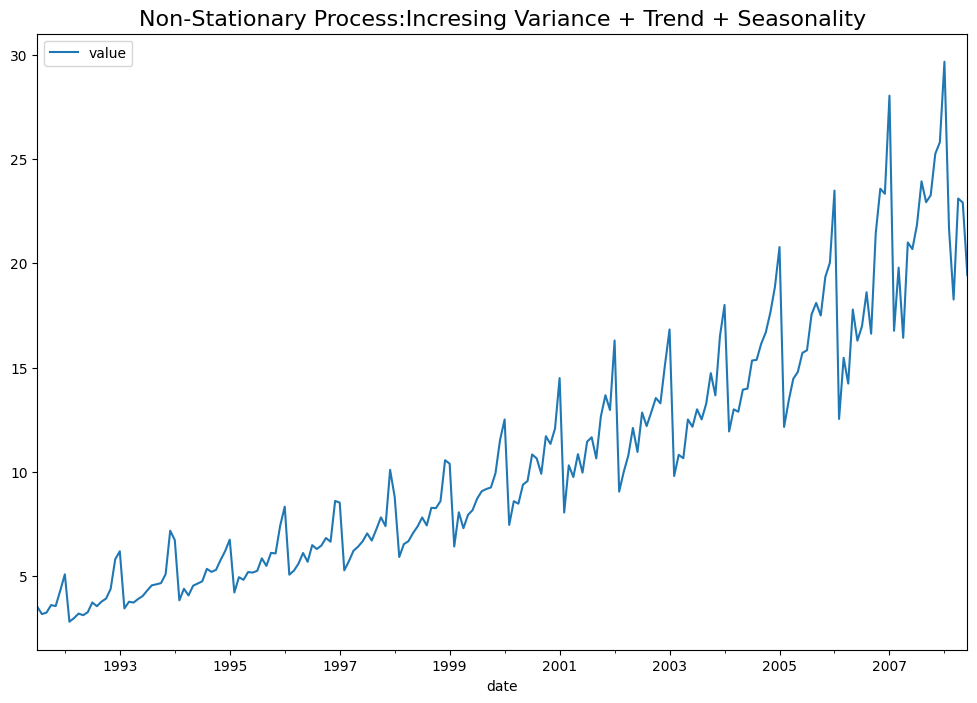

In [64]:
df.plot(figsize=[12,8])
plt.title('Non-Stationary Process:Incresing Variance + Trend + Seasonality',fontsize=16)
plt.show()

In [65]:
## Variance Stabilizing Transformation (VST) by Taking Logarithm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df_vst = np.log(df.value)
df_vst.head()

date
1991-07-01    1.260332
1991-08-01    1.157161
1991-09-01    1.179338
1991-10-01    1.283986
1991-11-01    1.271408
Name: value, dtype: float64

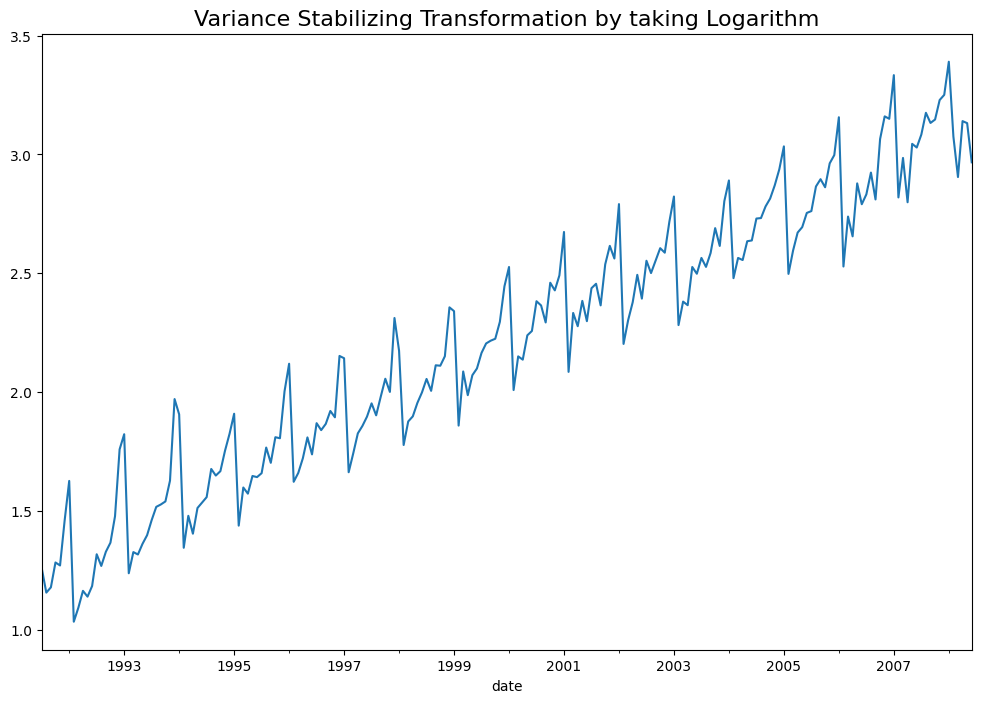

In [72]:
## plotting
## 로그로 변환!!!!

df_vst.plot(figsize=(12,8))
plt.title("Variance Stabilizing Transformation by taking Logarithm", fontsize=16)
plt.show()

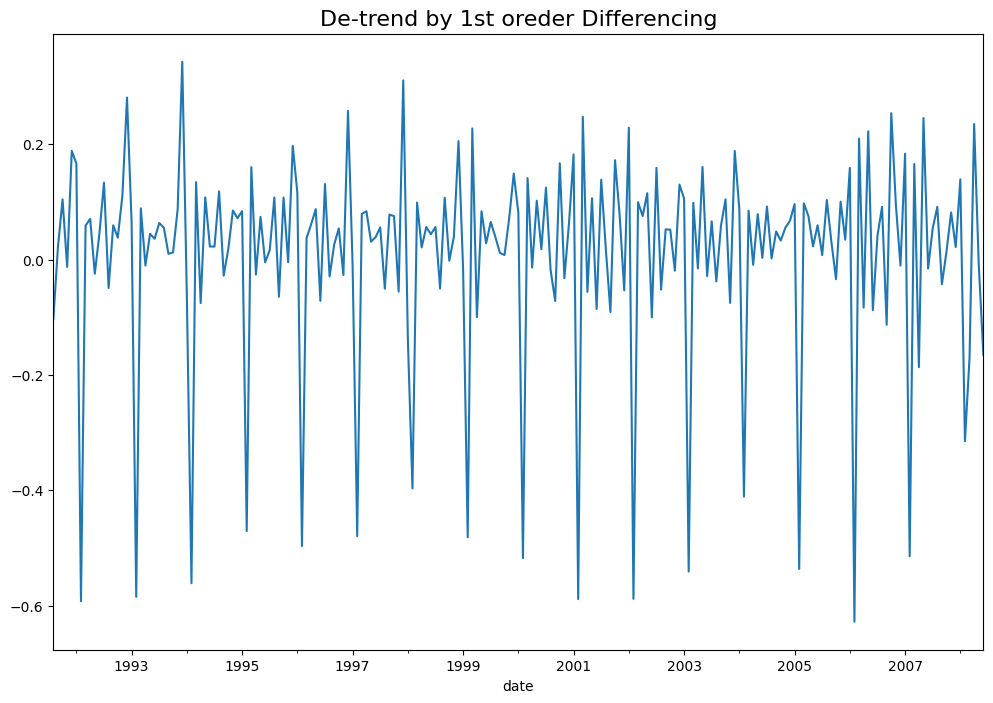

In [73]:
## De-trend by Differencing
## 하루 전 날 데이터 빼기

df_vst_diff1 = df_vst.diff(1).dropna()
df_vst_diff1
plt.figure(figsize=(12,8))
df_vst_diff1.plot()
plt.title("De-trend by 1st oreder Differencing",fontsize=16)
plt.show()

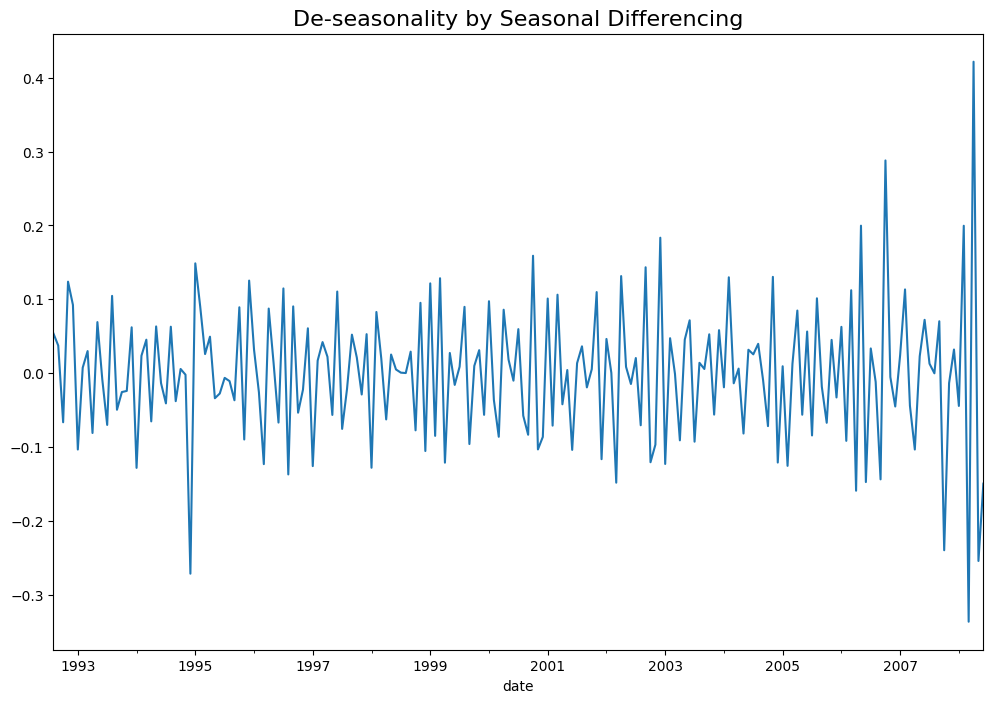

In [74]:
## Stationary Process:De -seasonaliry by Seasonal Differencing
## 12전으로 함수 처분
df_vst_diff1_diff12 = df_vst_diff1.diff(12).dropna()
## plotting
plt.figure(figsize=(12,8))
df_vst_diff1_diff12.plot()
plt.title("De-seasonality by Seasonal Differencing", fontsize=16)
plt.show()